In [1]:
# Import needed packages
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
import rioxarray as rxr
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

from matplotlib_scalebar.scalebar import ScaleBar


## Open the vector polygon data of the NYC NTA and Borough Boundaries

In [9]:
# Neighborhood 
nta = gpd.read_file('../data/2010 Neighborhood Tabulation Areas (NTAs)/geo_export_65077844-70de-4bb7-91ce-729f59546bad.shp')
nta.crs

nta.to_crs(epsg=6347, inplace=True)
print(nta.crs)

# Borough
boro = gpd.read_file("../data/Borough Boundaries/geo_export_da053023-9b69-4e71-bbff-eb976f919a31.shp")

boro.to_crs(epsg=6347, inplace=True)
print(boro.crs)
# KDE Shapefile
kde = gpd.read_file('../data/L1/all_affordable_housing_kde_contours.shp').to_crs(6347)
print(kde.crs) # already in correct crs

# subset layers
cont50 = kde[kde['contlabel'] == '50']
cont25 = kde[kde['contlabel'] == '25']
cont75 = kde[kde['contlabel'] == '75']

EPSG:6347
EPSG:6347
epsg:6347


In [17]:
# Load the affordable housing kde raster
file_name = '../data/L1/KDE_allaffordable_1ha_scaled_match.tiff'

r = rxr.open_rasterio(file_name, masked=True)
data_plotting_extent = plotting_extent(r[0], r.rio.transform())


In [18]:
r

<xarray.DataArray (band: 1, y: 469, x: 468)>
[219492 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.63e+05 5.632e+05 ... 6.096e+05 6.098e+05
  * y            (y) float64 4.53e+06 4.53e+06 4.53e+06 ... 4.483e+06 4.483e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  1
    STATISTICS_MEAN:     -0.85043408538533
    STATISTICS_MINIMUM:  -1
    STATISTICS_STDDEV:   0.26421932187557
    scale_factor:        1.0
    add_offset:          0.0

### CONTOURS of Kernel Density Estimates
the smallest region which contains the respective probability mass (e.g. 25%, 50%, 75%)

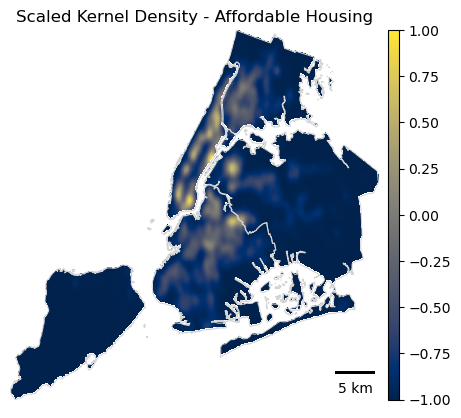

<Figure size 640x480 with 0 Axes>

In [21]:
# Define color ramp for housing kernel density
color_ramp = 'cividis'


# Plot uncropped array
f, ax = plt.subplots()


boro.boundary.plot(ax=ax, color = "lightgrey", lw = 0.75)

ep.plot_bands(r.values,
              cmap = color_ramp,
            ax=ax,
            title="Scaled Kernel Density - Affordable Housing",
            extent=data_plotting_extent)  # Use plotting extent from DatasetReader object



# Scale bar
ax.add_artist(ScaleBar(dx=1, location = 'lower right'))

ax.axis('off')

plt.show()
plt.savefig('../figs/affordable_housing_raster_0.png')

In [59]:
# Create a mask to see which neighborhoods fall within certain kde contours
nta_25 = gpd.sjoin(nta, cont25, predicate = 'intersects')
nta_50 = gpd.sjoin(nta, cont50, predicate = 'intersects')
nta_75 = gpd.sjoin(nta, cont75, predicate = 'intersects')


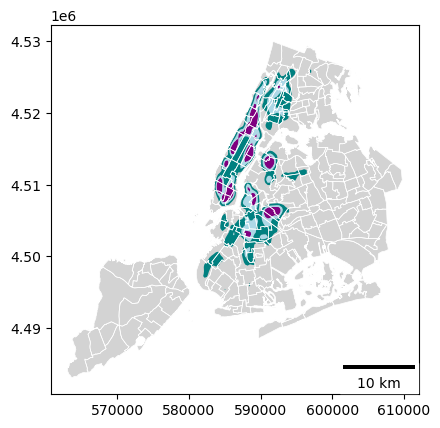

<Figure size 640x480 with 0 Axes>

In [55]:
# Plot Neighborhoods with Kernel Density Contours
f, ax = plt.subplots()


nta.plot(ax=ax, color = "lightgrey")
nta.boundary.plot(ax=ax, color = "white", lw = 0.5)
#nta_25.plot(ax=ax, color = "purple")
#nta_50.plot(ax=ax, color = "lightblue")
#nta_75.plot(ax=ax, color = "teal")


cont25.plot(ax=ax, color = "purple", lw = 1)
cont50.plot(ax=ax, color = "lightblue", lw = 1)
cont75.plot(ax=ax, color = "teal", lw = 1)

# Scale bar
ax.add_artist(ScaleBar(dx=1, location = 'lower right'))


plt.show()
plt.savefig('../figs/affordable_housing_kdecont_0.png')

#plt.savefig('../figs/affordable_housing_kdecont_contain_nta_3.png')


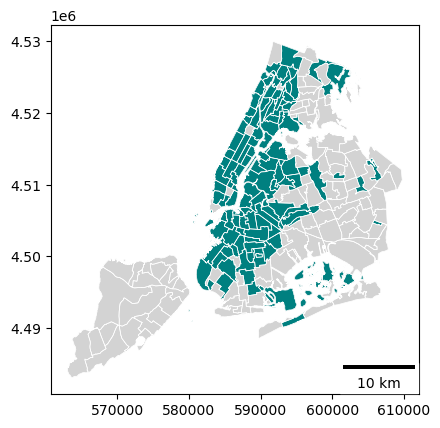

<Figure size 640x480 with 0 Axes>

In [60]:
# Plot Neighborhoods with That Contain Kernel Density Contours
f, ax = plt.subplots()


nta.plot(ax=ax, color = "lightgrey")
nta.boundary.plot(ax=ax, color = "white", lw = 0.5)
#nta_25.plot(ax=ax, color = "purple")
#nta_50.plot(ax=ax, color = "lightblue")
nta_75.plot(ax=ax, color = "teal")


#cont25.plot(ax=ax, color = "purple", lw = 1)
#cont50.plot(ax=ax, color = "lightblue", lw = 1)
#cont75.plot(ax=ax, color = "teal", lw = 1)

# Scale bar
ax.add_artist(ScaleBar(dx=1, location = 'lower right'))


plt.show()
#plt.savefig('../figs/affordable_housing_kdecont_0.png')

plt.savefig('../figs/affordable_housing_kdecont_contain_nta_2.png')

# Do the same with just Subsidized

In [4]:
from pathlib import Path
from eomaps import Maps
import geopandas as gpd

ModuleNotFoundError: No module named 'eomaps'

In [ ]:

# read shapefile
boro = gpd.read_file('../data/Borough Boundaries/geo_export_da053023-9b69-4e71-bbff-eb976f919a31.shp').set_crs(epsg = 4326)

# create a map in epsg=3006
m = Maps(crs=3006, figsize=(10, 8))
# add stamen-terrain basemap
m.add_wms.OpenStreetMap.add_layer.stamen_terrain()
# plot shapefile (zorder=2 to be on top of the DEM)
m.add_gdf(abisveg, column=abisveg.VEGKOD, cmap="viridis", ec="k", lw=0.2, alpha=0.5, zorder=2)
# plot DEM
m2 = m.new_layer_from_file.GeoTIFF(p / "nh_75_6.tif", cmap="Greys", zorder=1)

m.ax.set_extent((589913.0408156103, 713614.6619114348, 7495264.310799116, 7618965.93189494),
                Maps.CRS.epsg(3006))
